# Case study 3 - Artificial Neural Network

Import required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Read the dataset into python environment**

In [5]:
df=pd.read_csv('/content/mobile_price_classification.csv')

**Check basic details of dataset**

In [6]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
#Check for null values
df.isnull().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

Standard Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['battery_power'] = sc.fit_transform(df[['battery_power']])
df['clock_speed'] = sc.fit_transform(df[['clock_speed']])
df['int_memory'] = sc.fit_transform(df[['int_memory']])
df['mobile_wt'] = sc.fit_transform(df[['mobile_wt']])
df['px_height'] = sc.fit_transform(df[['px_height']])
df['px_width'] = sc.fit_transform(df[['px_width']])
df['ram'] = sc.fit_transform(df[['ram']])

Split the dataset into test and train

In [8]:
X = df.drop('price_range',axis=1)
y = df.price_range

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

**Build ANN model**

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 3s 2ms/step - loss: 2.9370 - accuracy: 0.2640
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 2.2015 - accuracy: 0.2713
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 1.9252 - accuracy: 0.2893
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 1.7185 - accuracy: 0.3133
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5699 - accuracy: 0.3273
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4636 - accuracy: 0.3440
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 1.3796 - accuracy: 0.3787
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 1.3002 - accuracy: 0.4073
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 1.2193 - accuracy: 0.4520
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 1.1257 - accuracy: 0.4947
Epoch 11/

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


**Plot accuracy**

Text(0, 0.5, 'Accuracy')

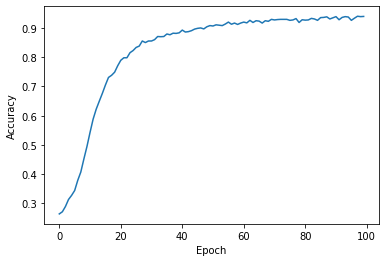

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

**Loss plot**

Text(0.5, 0, 'epoch')

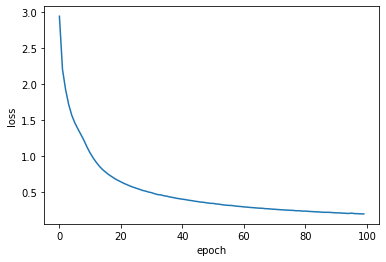

In [16]:
plt.plot(history.history['loss'])

plt.ylabel('loss')
plt.xlabel('epoch')